<font size = 5 color = 'blue'>**Data analysis of student exam performances**</font>

- Introduction:
    * Student Exams Profermances dataset provides three subjects' scores and five factors of 1,000 students
    * Three subjects : Math, Reading and Writing
    * Five factors : Gender, Race, Parental education, Compeletion of test preparetion courses and Type of lunch

- Reason we need to analyst this dataset:
    * Discover the reasons why students have a greater variation on scores
    * Help students to gain higher scores so that they can have more oppotunity to enter into better schools
    * Clearly understand that what kind of students are good at what kind of subjects
    * Pay more attention on the subjects that they are bad at
    * Develop good subjects further

Data resource: https://www.kaggle.com/spscientist/students-performance-in-exams

#  Import dataset

In [1]:
import pandas as pd

In [2]:
StudentsPerformance = pd.read_csv('/Users/Katerina/Desktop/EDA/StudentsPerformance.csv')

#  Check info of dataset

## Detailed info about dataset

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
StudentsPerformance.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [5]:
print("# recoreds in the dataset:{}".format(StudentsPerformance.shape[0]))
print("# features in the dataset:{}".format(StudentsPerformance.shape[1]))

# recoreds in the dataset:1000
# features in the dataset:8


In [6]:
StudentsPerformance.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [7]:
StudentsPerformance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Check if there is any nan in the dataset

In [8]:
StudentsPerformance.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There is no nan in the dataset

## Check categorial features in the dataset

In [9]:
StudentsPerformance_gender = pd.DataFrame({'count':
                                           StudentsPerformance.groupby('gender')['gender'].count()})
print(StudentsPerformance_gender)



        count
gender       
female    518
male      482


gender can be said to be evenly distributed.

                count
race/ethnicity       
group A            89
group B           190
group C           319
group D           262
group E           140


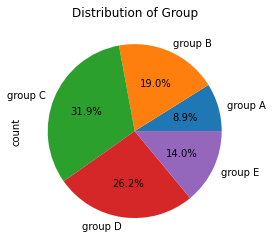

In [10]:
StudentsPerformance_race = pd.DataFrame({'count':StudentsPerformance.groupby('race/ethnicity')['race/ethnicity'].count()})
print(StudentsPerformance_race)


StudentsPerformance_race.plot.pie(y = 'count', autopct="%.1f%%", legend=None,title = 'Distribution of Group')
plt.show()


As we can see, the distribution between race/ethnicith is not balanced, group C is predominate

                             count
parental level of education       
some college                   226
associate's degree             222
high school                    196
some high school               179
bachelor's degree              118
master's degree                 59


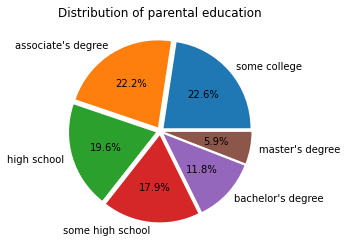

In [11]:
StudentsPerformance_parental_level_of_education = pd.DataFrame(
    {"count":StudentsPerformance.groupby('parental level of education')['parental level of education'].count()})
StudentsPerformance_parental_level_of_education = StudentsPerformance_parental_level_of_education.sort_values(by = 'count',ascending = False)
print(StudentsPerformance_parental_level_of_education)

labels = StudentsPerformance_parental_level_of_education.index

plt.title('Distribution of parental education')
plt.pie(x = StudentsPerformance_parental_level_of_education['count'], autopct="%.1f%%", labels=labels, 
        explode = [0.05]*6)

plt.show()

The level of parents'education is not balanced, an amount of parents have college degree.

In [12]:
StudentsPerformance_lunch = pd.DataFrame({
    'count':StudentsPerformance.groupby('lunch')['lunch'].count()})
StudentsPerformance_lunch.sort_values(by = 'count',ascending = False)

,count
lunch,
standard,645
free/reduced,355


The 'lunch' feature is also not even, the students with standard is more than that with free/reduced.

In [13]:
StudentsPerformance_test_preparation_course = pd.DataFrame(
    {"count":StudentsPerformance.groupby('test preparation course')['test preparation course'].count()})
StudentsPerformance_test_preparation_course

,count
test preparation course,
completed,358
none,642


Students who have not completed test preparation courses are majority.

## Check Numerical variables

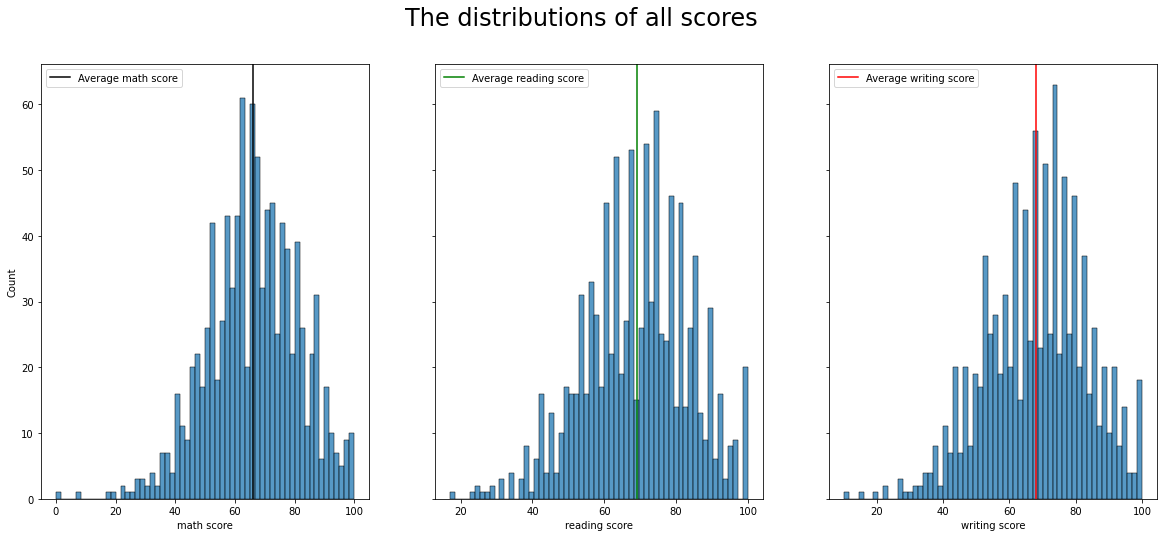

In [14]:
fig,ax = plt.subplots(1,3,sharey=True, figsize = (20,8))
ax1 = sns.histplot(data=StudentsPerformance, x= 'math score',bins=60,ax=ax[0])
ax1.axvline(StudentsPerformance['math score'].mean(),0,1,color = 'k', label = 'Average math score')
ax1.legend()

ax2 = sns.histplot(data=StudentsPerformance, x='reading score', bins= 60,ax=ax[1])
ax2.axvline(StudentsPerformance['reading score'].mean(),0,1,color = 'g',label = 'Average reading score')
ax2.legend()

ax3 = sns.histplot(data=StudentsPerformance, x='writing score', bins=60,ax=ax[2])
ax3.axvline(StudentsPerformance['writing score'].mean(),0,1,color = 'r', label = 'Average writing score')
ax3.legend()

plt.suptitle('The distributions of all scores',fontsize = 24)
plt.show()

The average scores of both of three subjects lie in the range of 65-70,

In the math score, the scores accumulate in the range of 60-75,

The majority of reading and writing scores are in the range of 60-80.

In [15]:
StudentsPerformance['Average_total_score'] = (StudentsPerformance['math score'] + StudentsPerformance['reading score']
                                            +StudentsPerformance['writing score'])/3

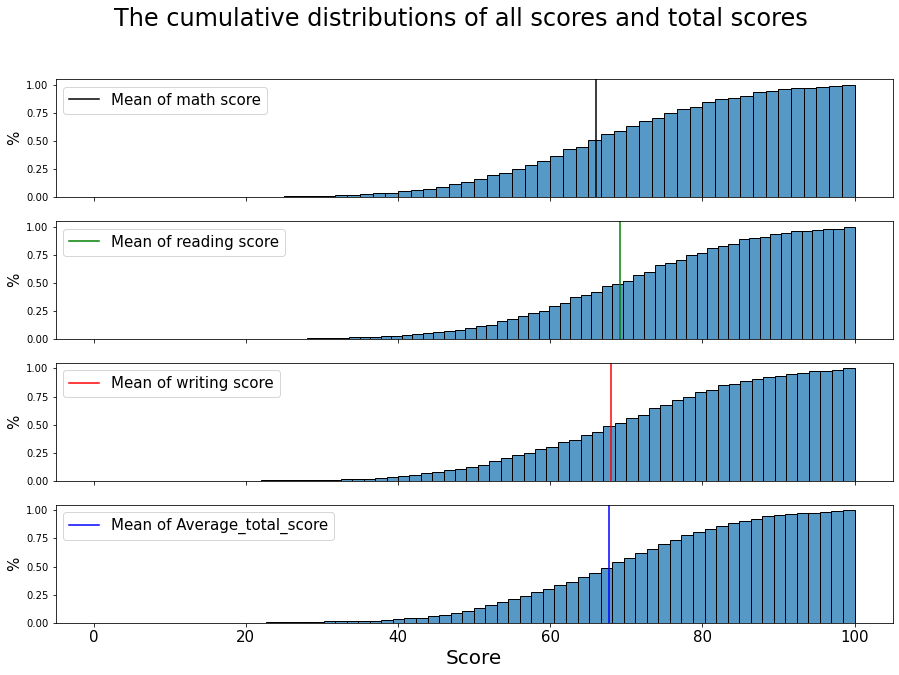

In [16]:
import matplotlib.axes
fig,axes= plt.subplots(4,1,sharey=True,sharex=True,figsize = (15,10))
scores = ['math score','reading score','writing score','Average_total_score']
colors = ['k','g','r','b']
for subject,ax,color in zip(scores,axes,colors):
        draw = sns.histplot(data=StudentsPerformance, x= subject,cumulative=True,stat='probability',bins=60,ax=ax)
        draw.axvline(StudentsPerformance[subject].mean(),0,1,color = color, label = 'Mean of {}'.format(subject))
        matplotlib.axes.Axes.tick_params(draw, axis = 'y',labelsize=10)
        draw.legend(fontsize = 15)
        draw.set_ylabel('%',size = 15)
        

        

plt.xticks(fontsize=15)
plt.xlabel('Score',size = 20)
plt.suptitle('The cumulative distributions of three subjects and average of total three subjects',fontsize = 24)
plt.show()

Average reading score obviously excess other subjects

# How one catgorical feature impacts scores

## Gender vs. Scores

In [17]:
def create_df(t):
    df = pd.melt(StudentsPerformance[[t,'math score','reading score','writing score']], 
            id_vars=[t],value_vars=['math score','reading score','writing score'],
            var_name = 'subjects',value_name = 'score')
    return df

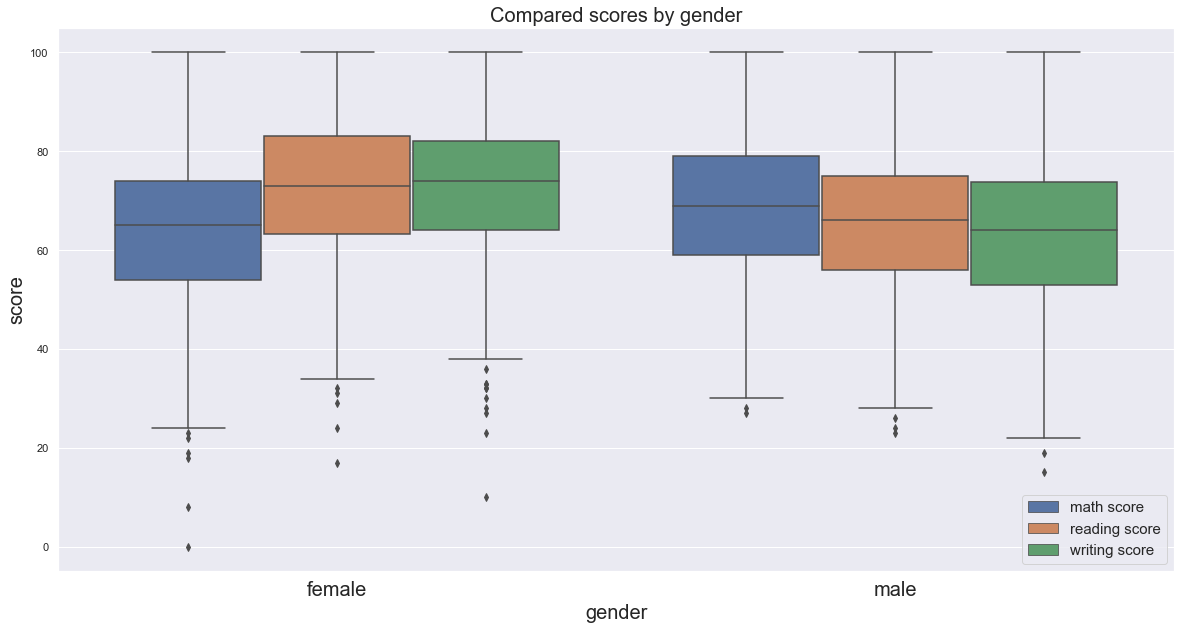

In [18]:
gender_all_score = create_df('gender')

plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
sns.boxplot(x='gender',y='score',   
            hue='subjects', data=gender_all_score)
plt.title('Compared scores by gender',size = 20)
plt.xticks(fontsize = 20)
plt.xlabel('gender',size = 20)
plt.ylabel('score',size = 20)
plt.legend(loc = 'best',fontsize = 15)
plt.show()

Female students have higher scores on reading and writing, Male students are good at math

## Group vs. Score

In [19]:
import numpy as np

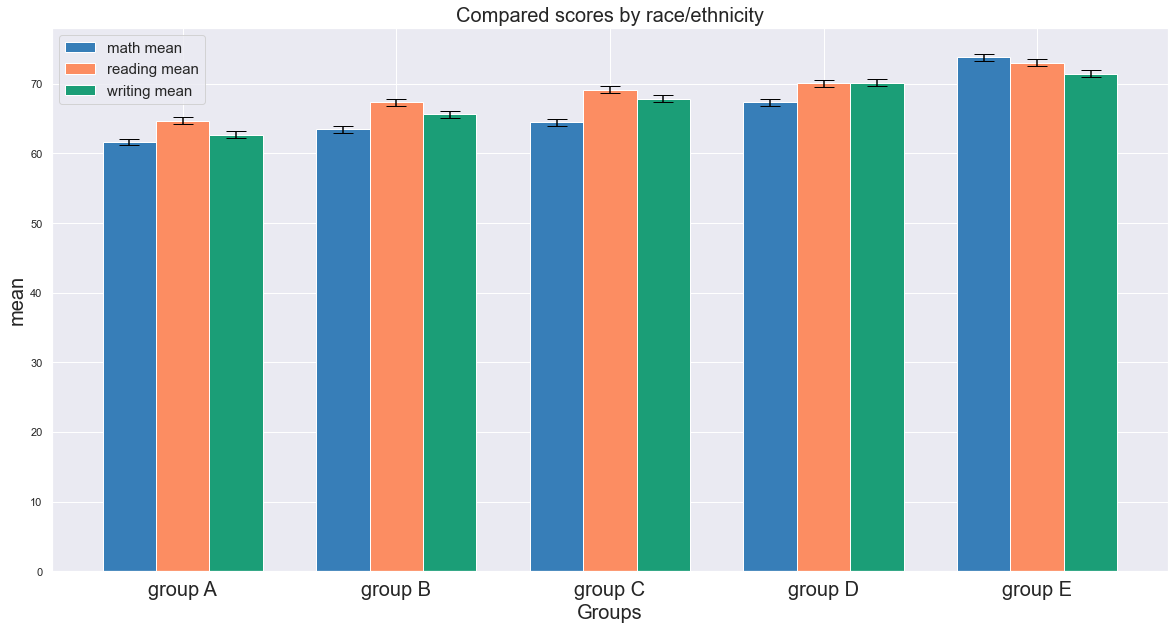

In [20]:
race_math = pd.DataFrame({'mean':StudentsPerformance.groupby('race/ethnicity')['math score'].mean()})
race_reading= pd.DataFrame({'mean':StudentsPerformance.groupby('race/ethnicity')['reading score'].mean()})
race_writing= pd.DataFrame({'mean':StudentsPerformance.groupby('race/ethnicity')['writing score'].mean()})

plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
plt.title('Compared scores by race/ethnicity',size = 20)

race = StudentsPerformance['race/ethnicity'].unique()

barwidth = 0.25

r1 = np.arange(len(race))
r2 = [x + barwidth for x in r1]
r3 = [x + barwidth for x in r2]
r4 = [x + barwidth for x in r3]

plt.bar(r1, race_math['mean'], width = barwidth, color = '#377eb8',label = 'math mean',
        yerr =0.5, ecolor = 'black',capsize = 10)
plt.bar(r2, race_reading['mean'], width = barwidth, color = '#fc8d62',label = 'reading mean',
        yerr =0.5, ecolor = 'black',capsize = 10)
plt.bar(r3, race_writing['mean'], width = barwidth, color = '#1b9e77',label = 'writing mean',
        yerr =0.5, ecolor = 'black',capsize = 10)

plt.xticks([r + barwidth for r in range(len(race))],np.sort(StudentsPerformance['race/ethnicity'].unique()).tolist(),
           rotation = 0, fontsize = 20)
plt.xlabel('Groups',size = 20)
plt.ylabel('mean',size = 20)
plt.legend(fontsize = 15)
plt.show()


The scores of all three subjects are greater than that of group A

Compared with other groups, students in group E have higher math scores.

## Parental level of education vs. Scores

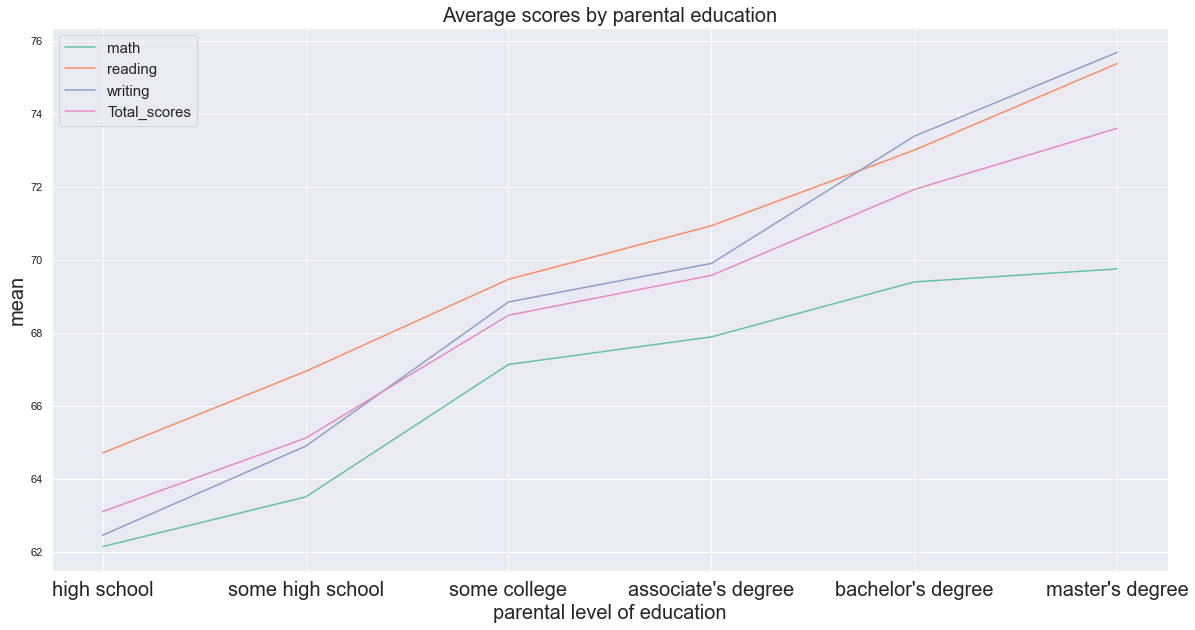

In [21]:
education_math = pd.DataFrame({'math':StudentsPerformance.groupby('parental level of education')['math score'].mean()})
education_reading = pd.DataFrame({'reading':StudentsPerformance.groupby('parental level of education')['reading score'].mean()})
education_writing = pd.DataFrame({'writing':StudentsPerformance.groupby('parental level of education')['writing score'].mean()})
education_avg_scores = pd.DataFrame({'Total_scores':StudentsPerformance.groupby('parental level of education')['Average_total_score'].mean()})
education_all_score = education_math.merge(education_reading,left_index=True,right_index=True).merge(
                        education_writing,left_index=True,right_index=True).merge(education_avg_scores,left_index=True,right_index=True)
education_all_score = education_all_score.sort_values(by='Total_scores', ascending=True)

plt.figure(figsize=(20,10))
plt.title('Average scores by parental education',size = 20)
sns.set_style('darkgrid')

sns.lineplot(data=education_all_score, palette='Set2',dashes=False)
plt.xlabel('parental level of education',size = 20)
plt.ylabel('mean', size=20)
plt.xticks(fontsize=20)
plt.legend(fontsize = 15)
plt.show()


higher degrees parents had, greater scores their childen can have

## Lunch vs. Scores

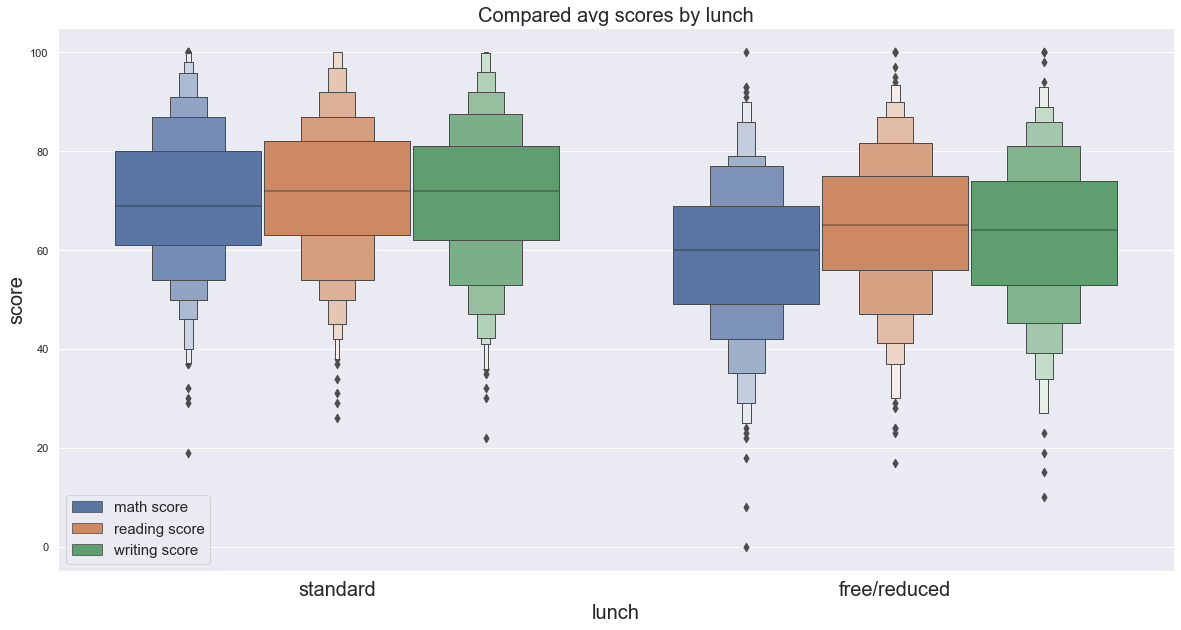

In [22]:
lunch_score = create_df('lunch')
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
plt.title('Compared avg scores by lunch',size = 20)

list_lunch = StudentsPerformance.groupby('lunch')['Average_total_score'].mean().sort_values(ascending = False).index.tolist()

sns.boxenplot(x='lunch', y= 'score',
           hue='subjects',order=list_lunch,data=lunch_score)

plt.ylabel('score', size = 20)
plt.xlabel('lunch', size = 20)
plt.xticks(fontsize = 20)

plt.legend(fontsize = 15)
plt.show()

Students with good lunch might get higher scores more than average scores.

## Test preparation course vs. Scores

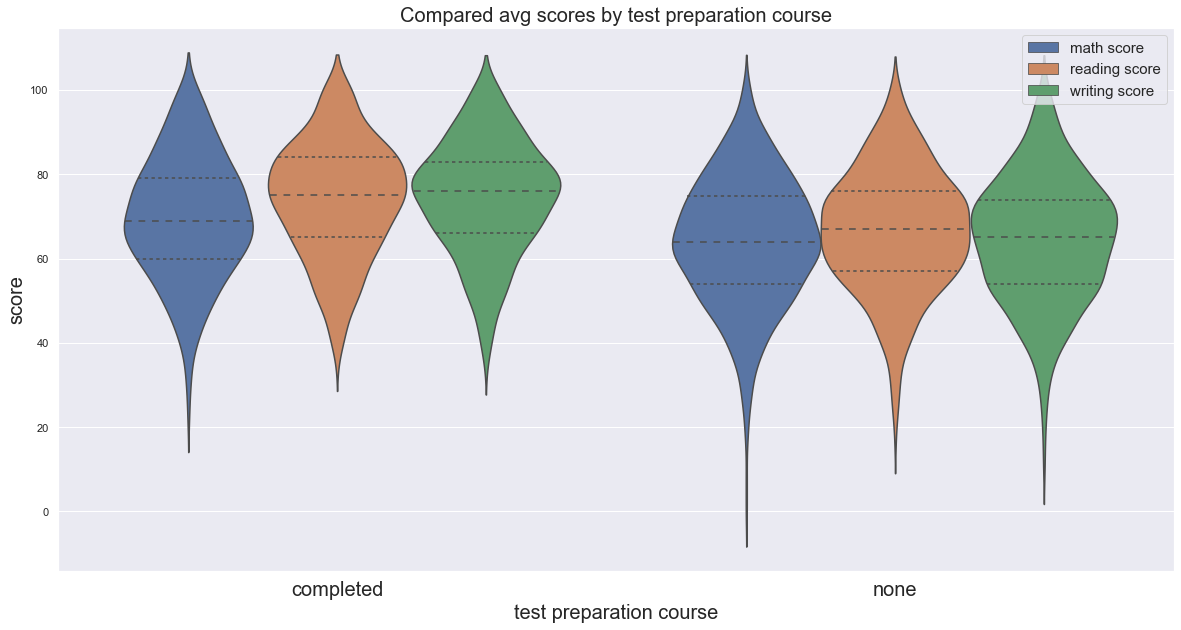

In [23]:
course_score = create_df('test preparation course')
plt.figure(figsize=(20,10))
sns.set_theme(style='darkgrid')
plt.title('Compared avg scores by test preparation course',size = 20)

list_course = StudentsPerformance.groupby('test preparation course')['Average_total_score'].mean().sort_values(ascending = False).index.tolist()

sns.violinplot(x= 'test preparation course', y='score',
           hue='subjects',data=course_score,order=list_course,inner='quartile')

plt.ylabel('score', size = 20)
plt.xlabel('test preparation course', size = 20)
plt.xticks(fontsize = 20)

plt.legend(fontsize = 15)
plt.show()

Students who have completed the test preparation courses got higher scores on both of three subjects

# How multiple categorial features impact on scores

In [24]:
def create_dataframe(x,y):
    if StudentsPerformance[x].nunique() < StudentsPerformance[y].nunique():
        print('Reverse position of arguments')
    else:
        df = pd.melt(StudentsPerformance[[x,y,'math score','reading score','writing score']], 
                id_vars=[x,y],value_vars=['math score','reading score','writing score'],
                var_name = 'subjects',value_name = 'score')
        return df

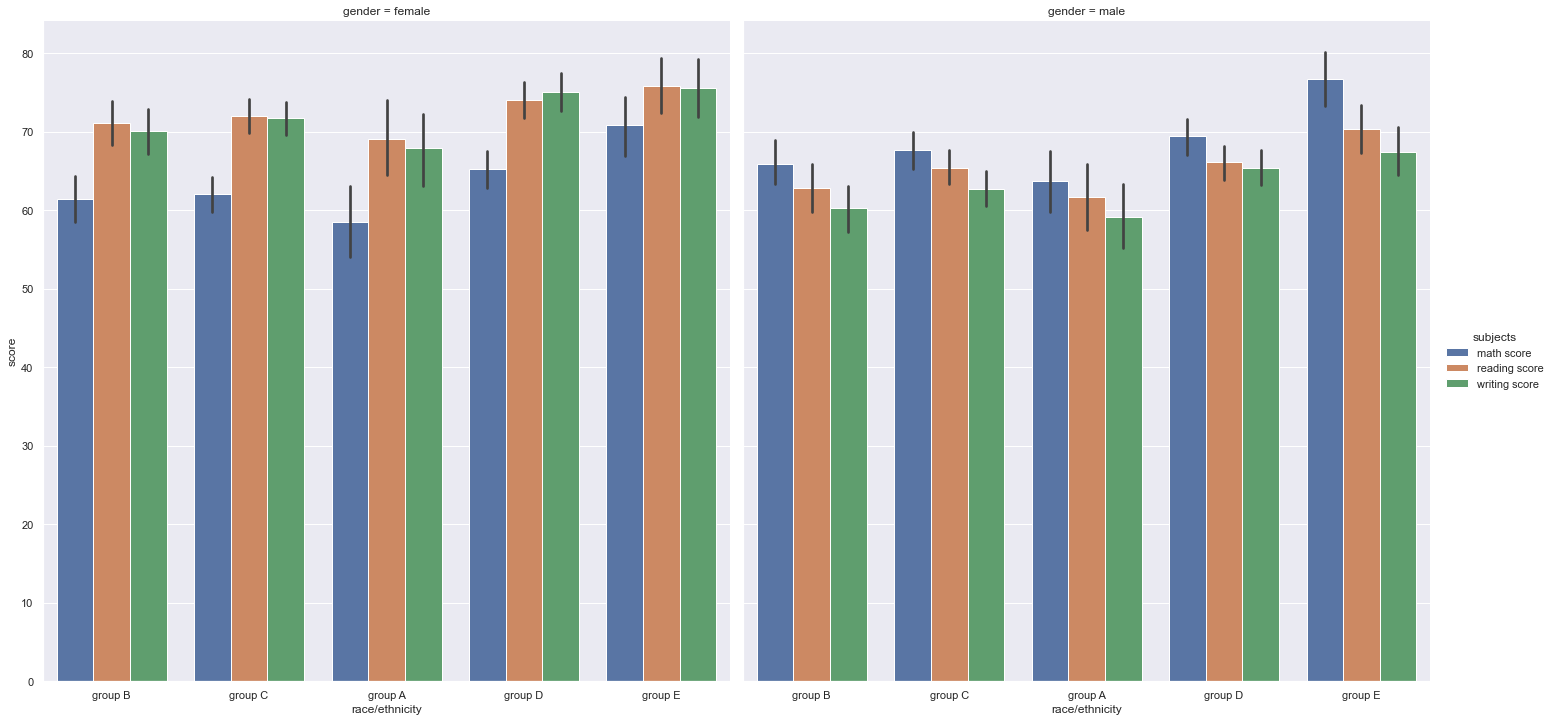

In [25]:
gender_group_score = create_dataframe('race/ethnicity','gender')

sns.set_style('darkgrid')

sns.catplot(x = 'race/ethnicity', y='score',
            hue = 'subjects',col='gender',kind='bar',data=gender_group_score, height=10)
plt.show()

In [26]:
gender_parental_education_score = create_dataframe('parental level of education','gender')

list_of_degrees = StudentsPerformance.groupby('parental level of education')['Average_total_score'].mean().sort_values(
                                             ascending = True).index.tolist()


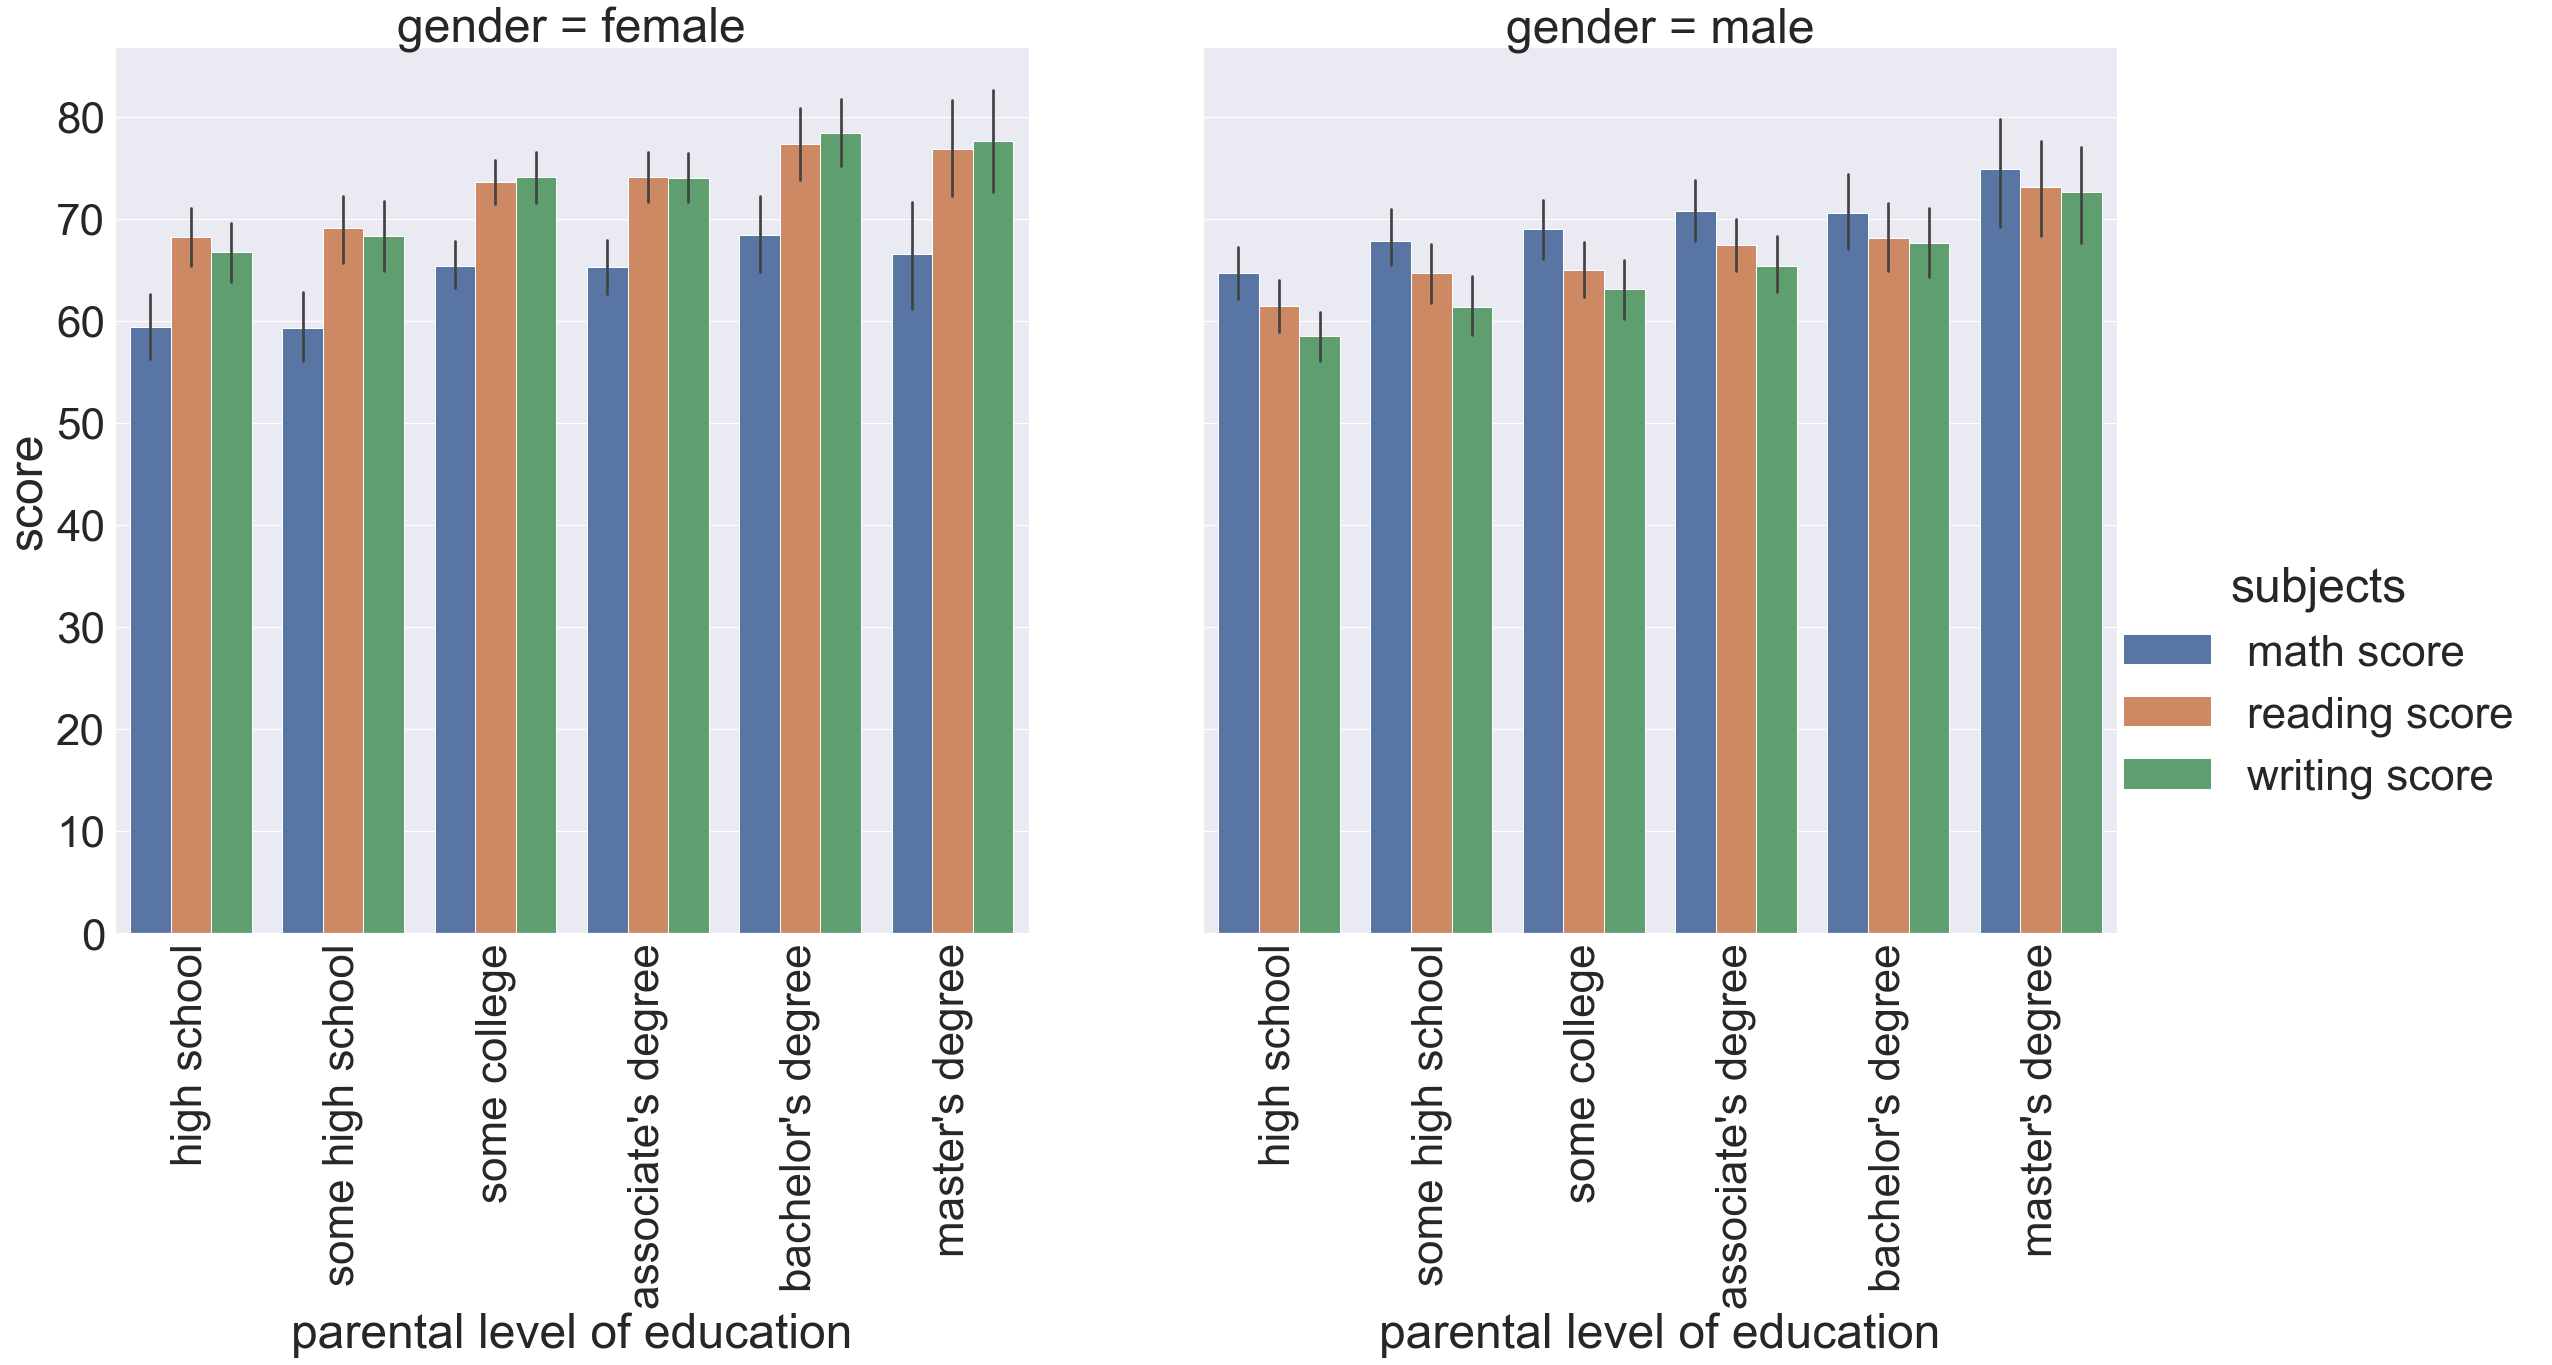

In [27]:
sns.set(font_scale = 4)
sns.set_style('darkgrid')
g = sns.catplot(x = 'parental level of education', y='score', hue= 'subjects',col='gender',kind='bar',
            data=gender_parental_education_score,order= list_of_degrees,height=15)
g.set_xticklabels(rotation=90)

plt.show(g)

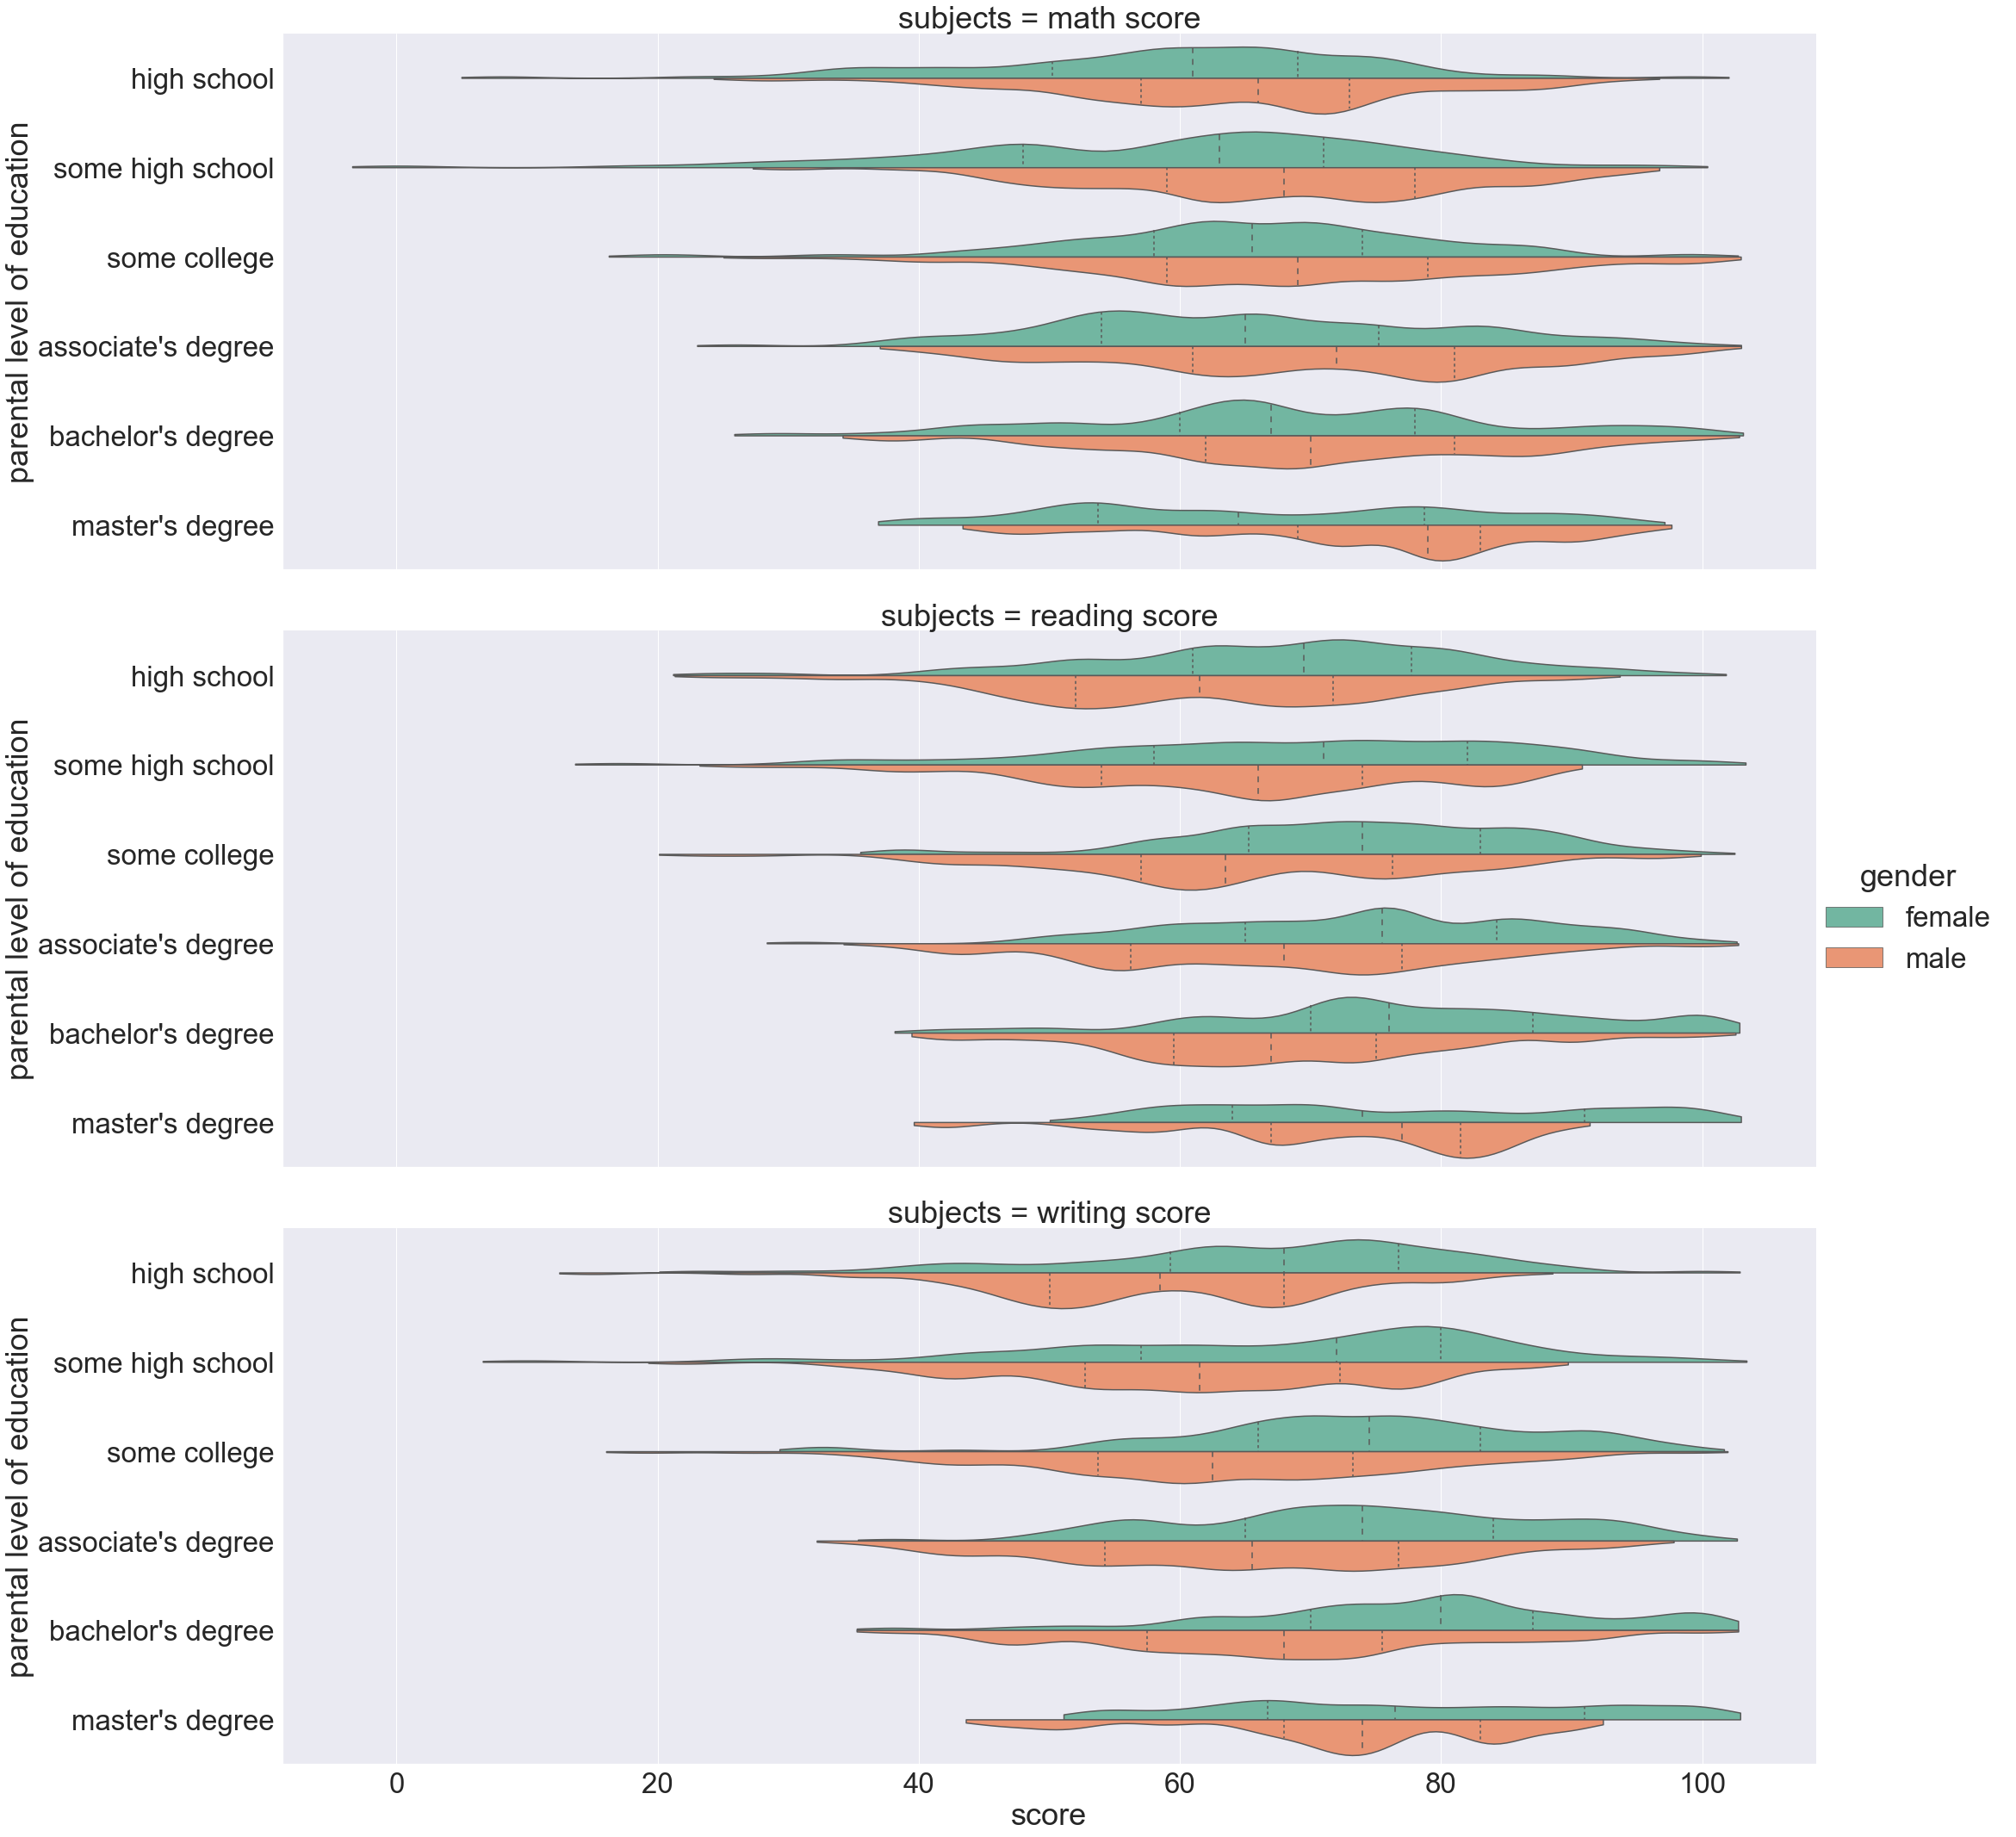

In [35]:
sns.set_theme(style="darkgrid", color_codes=True)

sns.set(font_scale = 3)
fig = sns.catplot(y = 'parental level of education', x='score',
            hue = 'gender',row='subjects',order=list_of_degrees,kind='violin',split=True,inner="quartile",
            data=gender_parental_education_score,palette='Set2',orient='h',
            height=10, aspect=3,cut=1, bw=.2)

plt.show(fig)
fig.savefig(fname = '/Users/Katerina/Desktop/EDA/educational_score.png')

higher degree of parental education, higher scores of reading and writing female students can gain

higher score of math male students can gain

higher parental education is hard to influence male students' abilities on reading and writing.

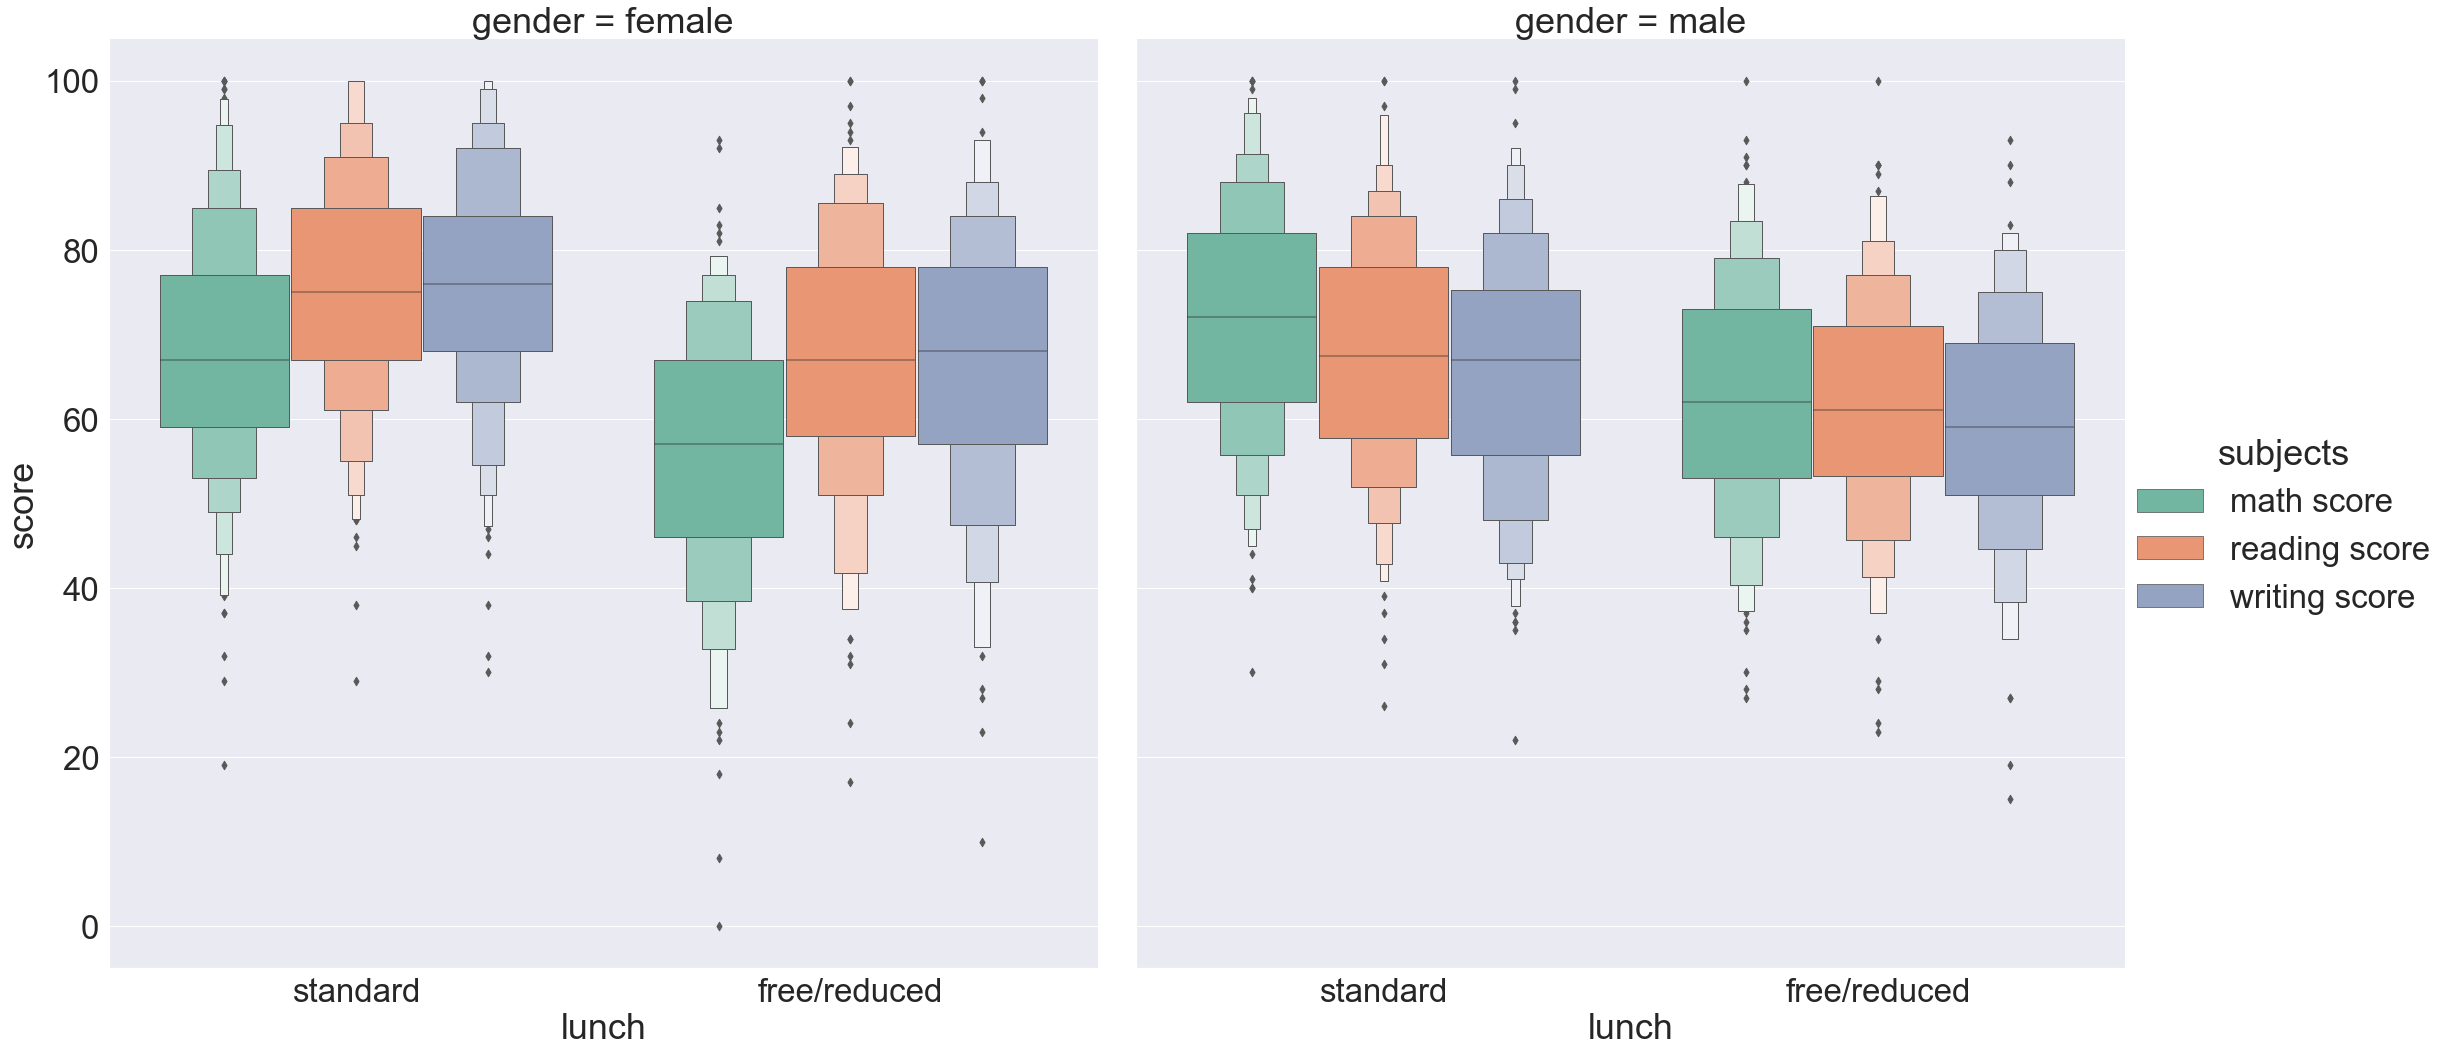

In [36]:
gender_lunch_score = create_dataframe('lunch','gender')

fig = sns.catplot(x='lunch',y='score',hue='subjects',col='gender', data=gender_lunch_score, kind='boxen', 
            palette='Set2', height = 15)
plt.show()
fig.savefig(fname = '/Users/Katerina/Desktop/EDA/lunch_score.png')

lunch might have an extent of impact on students scores

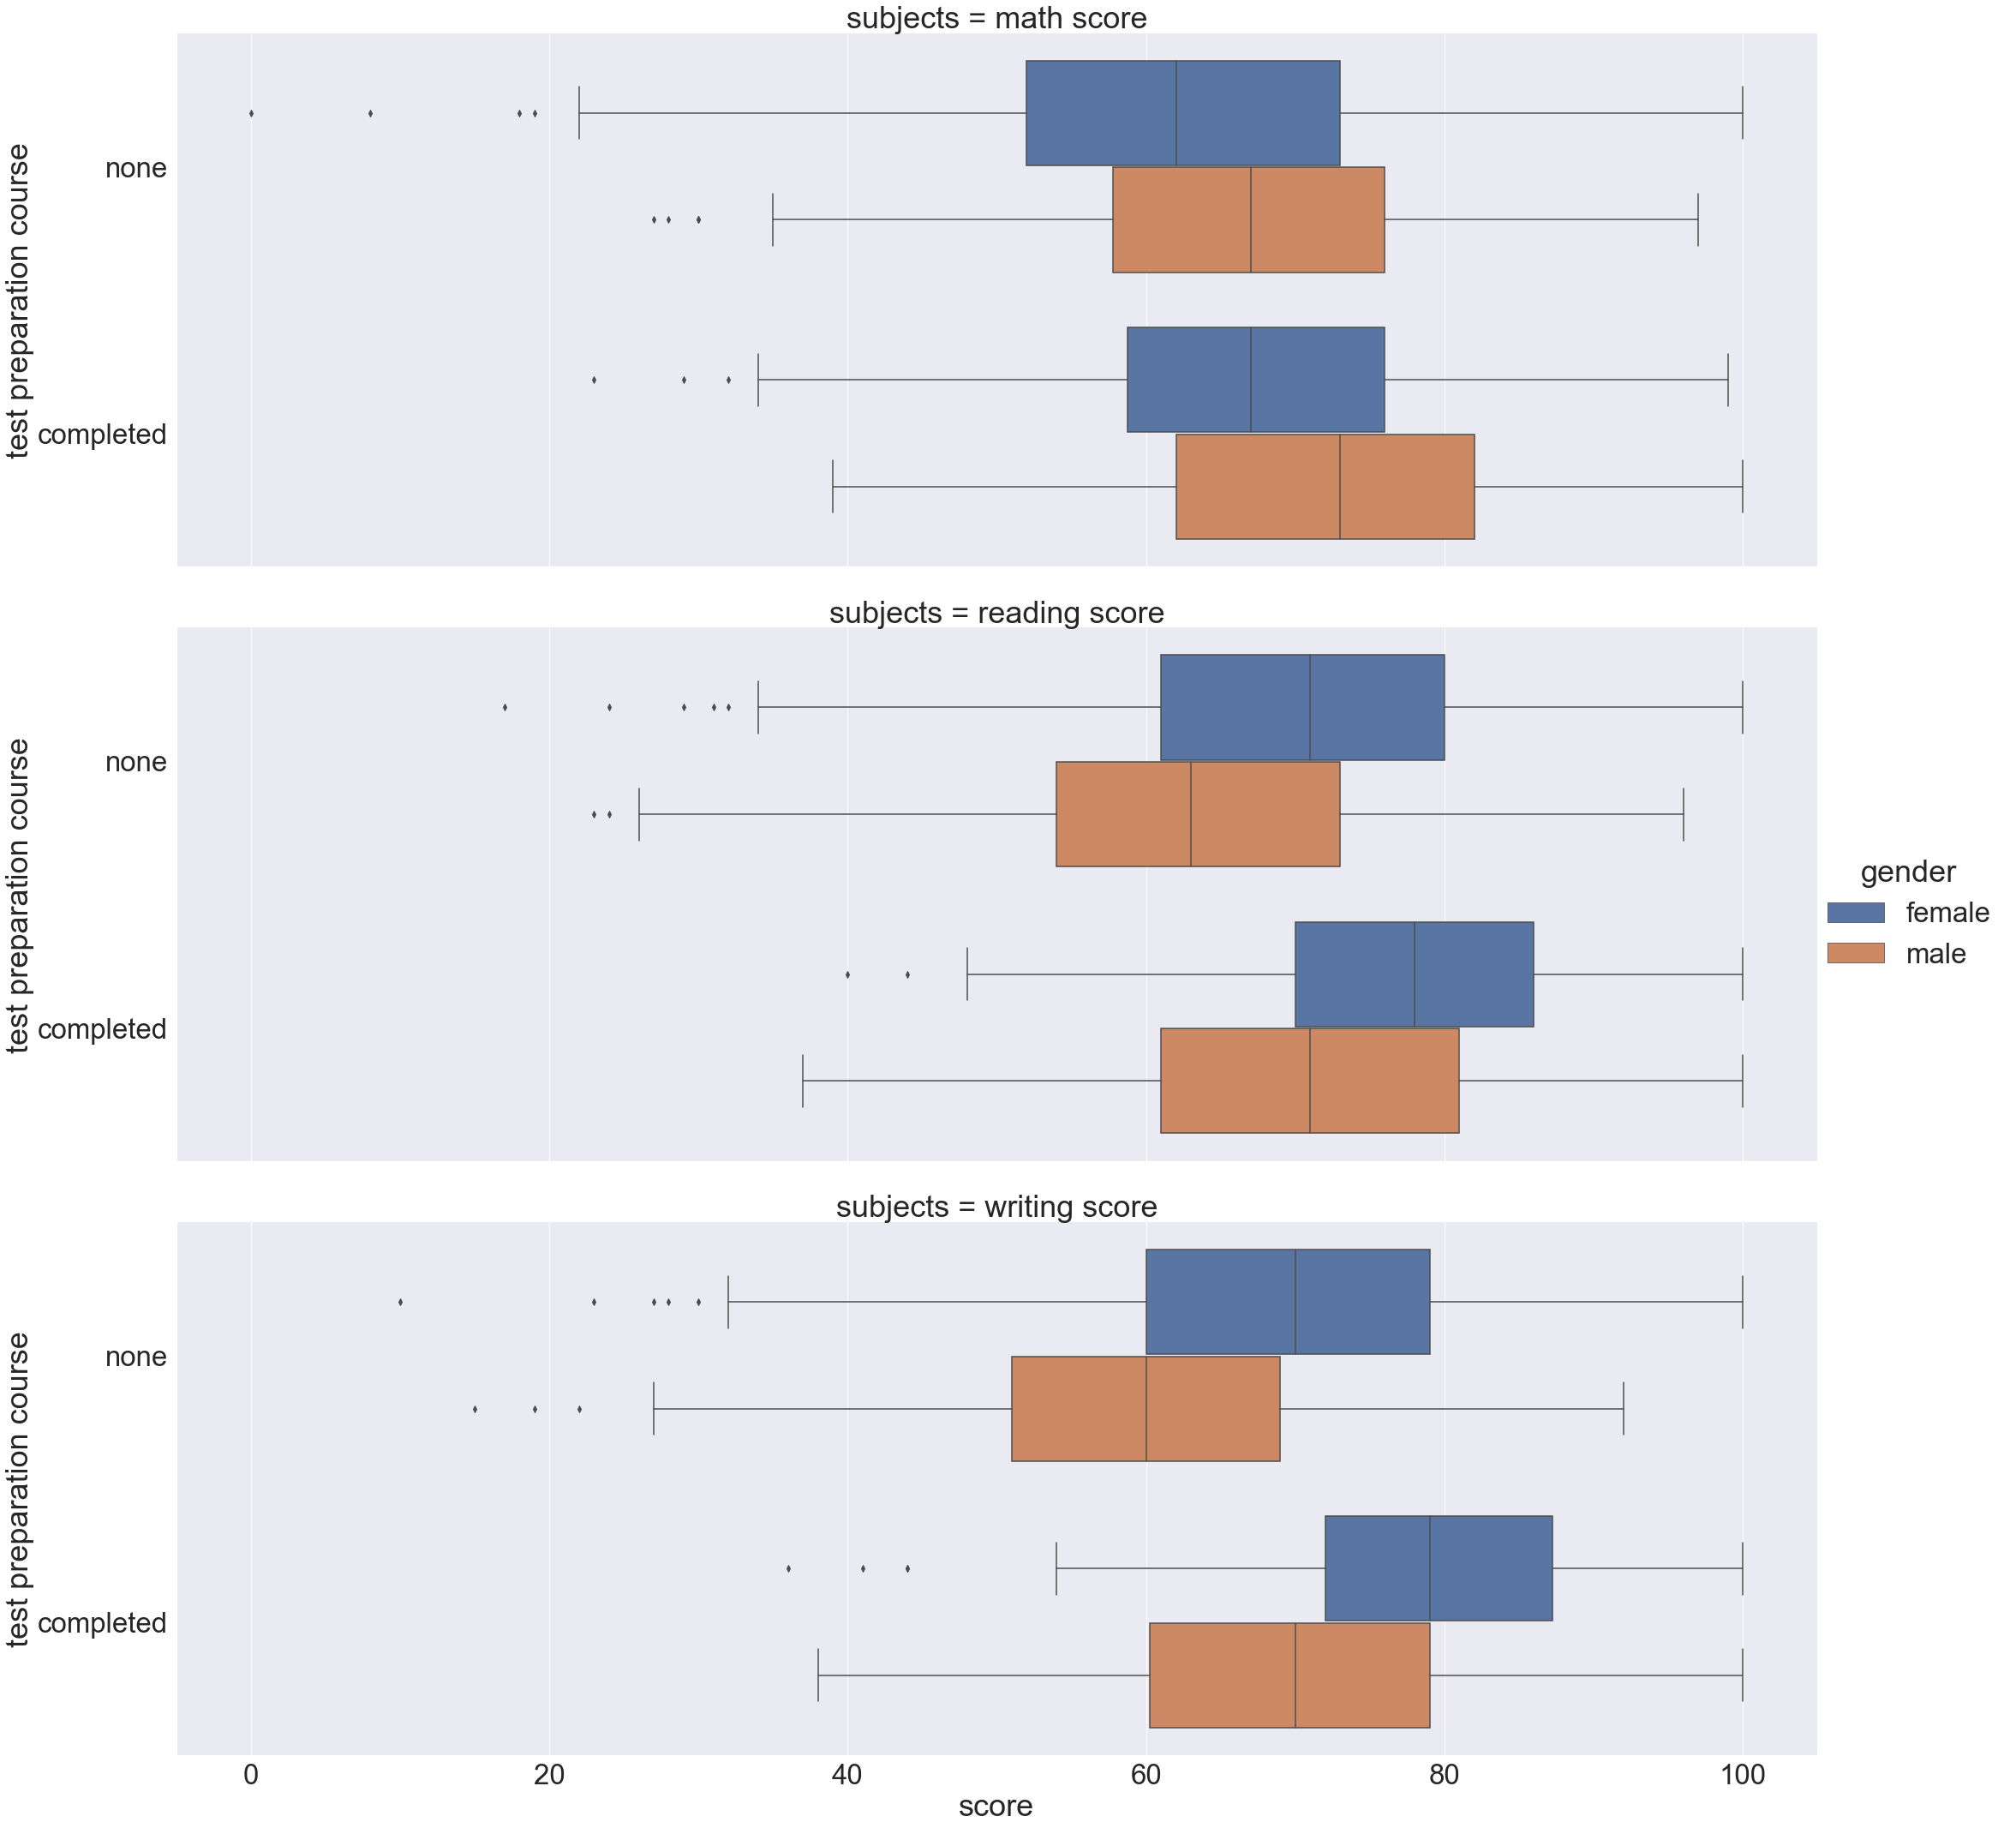

In [30]:
course_score = create_dataframe('test preparation course','gender')

sns.catplot(x='score', y= 'test preparation course',row= 'subjects',hue='gender', orient='h',aspect=3,
           data=course_score, kind='box',height = 10)
plt.show()

# Summary

<font size = 5 color = 'black'>**Conclusion:**</font>

- Female students are good at reading and writing
- Male students are better at math
- Higher parental education might have positive impacts on students' score, but have less influence on reading and wiriting of male students
- Different race might cause the variation on score
- Taking test preparation course and good lunch might have positive impacts on students'score